In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/data/dog'

In [ ]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Akita', 'Alaskan_Malamute', 'Afgan_Hound', 'Beagle', 'Belgian_Tervuren', 'Bichon_Frise', 'Bocker', 'Borzoi', 'Boxer', 'Bugg', 'Bulldog', 'Corgi', 'Phu_Quoc']
13


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [ ]:
dataset=[]
testset=[]
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        if t<=39:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1
    count=count+1

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)
labels1=to_categorical(labels0)
labels=np.array(labels1)
data=np.array(data)
test=np.array(test)
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(416, 180, 180, 3)
(104, 180, 180, 3)
(416, 13)
(104, 13)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(13, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50
13/13 [==============================] - 25s 799ms/step - loss: 2.1427 - accuracy: 0.3341 - val_loss: 0.8190 - val_accuracy: 0.8173
Epoch 2/50
13/13 [==============================] - 5s 362ms/step - loss: 1.0636 - accuracy: 0.7043 - val_loss: 0.3995 - val_accuracy: 0.8942
Epoch 3/50
13/13 [==============================] - 5s 360ms/step - loss: 0.7389 - accuracy: 0.7644 - val_loss: 0.2763 - val_accuracy: 0.9231
Epoch 4/50
13/13 [==============================] - 5s 365ms/step - loss: 0.5601 - accuracy: 0.8197 - val_loss: 0.3978 - val_accuracy: 0.8558
Epoch 5/50
13/13 [==============================] - 5s 372ms/step - loss: 0.4691 - accuracy: 0.8510 - val_loss: 0.3614 - val_accuracy: 0.8750
Epoch 6/50
13/13 [==============================] - 5s 366ms/step - loss: 0.3984 - accuracy: 0.8726 - val_loss: 0.3166 - val_accuracy: 0.9038
Epoch 7/50
13/13 [==============================] - 5s 367ms/step - loss: 0.3265 - accuracy: 0.8918 - val_loss: 0.3030 - val_accuracy: 0.9135
Epoch

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11
           3       0.82      1.00      0.90         9
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       0.90      0.82      0.86        11
           7       1.00      1.00      1.00         5
           8       0.90      0.90      0.90        10
           9       1.00      1.00      1.00         6
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        10

    accuracy                           0.96       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.96      0.96      0.96       104



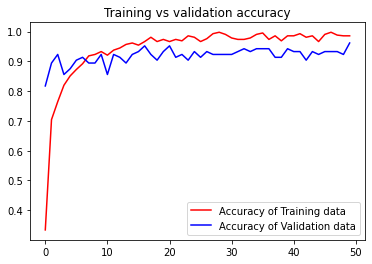

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

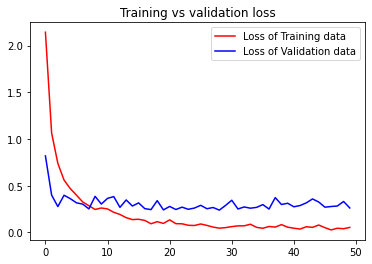

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

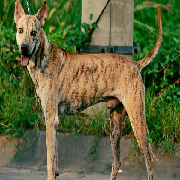

In [ ]:
load_img("/content/drive/MyDrive/data/test/cho-phu-quoc.jpg",target_size=(180,180))

In [ ]:
image=load_img("/content/drive/MyDrive/data/test/cho-phu-quoc.jpg",target_size=(180,180))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Phu_Quoc.


In [ ]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(130, 180, 180, 3)
(130, 13)


In [ ]:
ANS=testlabels0

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9076923076923077
